This notebook is meant for the students of Basics of Applied Mathematics, in the master of Mathematics in Data and Technology, Freiburg Univsersity, 2025

# Programming Exercise for Homework 9

## Your task

This notebook containa some code snippets with missing lines that you will have to fill in! Please also try to read and understand the parts that you do not have to fill in to understand better how the code works.

# Implement and visualize the Heavy ball method

## Description 

## Imports

In [1]:
import numpy as np # Package for array manipulations
import matplotlib.pyplot as plt # Package for plotting

# Jupyter magic command to make the plots a bit nicer
%matplotlib notebook 
                     # replace with "%matplotlib inline" 
                     # in case one uses the VS code UI
                     # instead of the Jupyter UI
            
            

## Define the problem

### Objective function 

We are interested in solving the following $1D$ optimization problem:
$$
\min_x \; f(x) = \frac{(x-2)^4}{100} - \frac{(x-1) \cos(x)^2}{2}
$$

The optimization algorithms will all start at $x_0 = 0$

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to compute function $f(x)$
</div>

In [2]:
def f(x):
    # ----- YOUR CODE
    value = 0.01 * (x-2)**4 -  0.5 * np.cos(x)**2 *(x-1)
    # --------- END YOUR CODE
    return value

### Visualize the problem

<IPython.core.display.Javascript object>


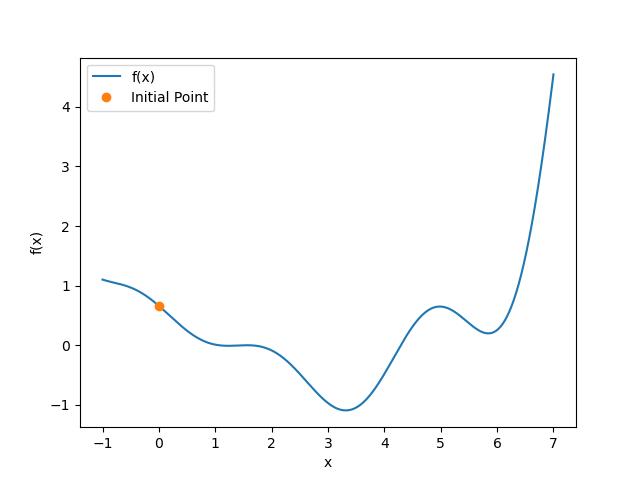

In [3]:
fig, ax = plt.subplots()
xs = np.linspace(-1, 7, num=1000)
fs = np.array([f(x) for x in xs])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.plot(xs, fs, label="f(x)")
ax.plot(0, f(0), "o", label="Initial Point")
ax.legend()

### Compute the gradient of $f$

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to compute function $f'(x)$
</div>

In [4]:
def fprime(x):
    # ----- YOUR CODE
    derivative = 0.04 * (x-2)**3 + np.cos(x)* np.sin(x)* (x-1) - 0.5 * np.cos(x)**2
    # --------- END YOUR CODE
    return derivative

### Implement the gradient descent method on $f$.

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to compute the iterates of the gradient descent on $f(x)$
</div>

In [5]:
def GD(x0, n_iter=100, alpha=0.1):
    iterates = []
    x = 1 * x0
    for k in range(n_iter):
        # ----- YOUR CODE
        x = x - alpha * fprime(x)
        # --------- END YOUR CODE
        iterates.append(x)
    return iterates

In [6]:
# Compute the solution of GD
x0 = 0
iterates_gd = GD(x0, alpha=0.1)

### Visualize the iterations 

<IPython.core.display.Javascript object>


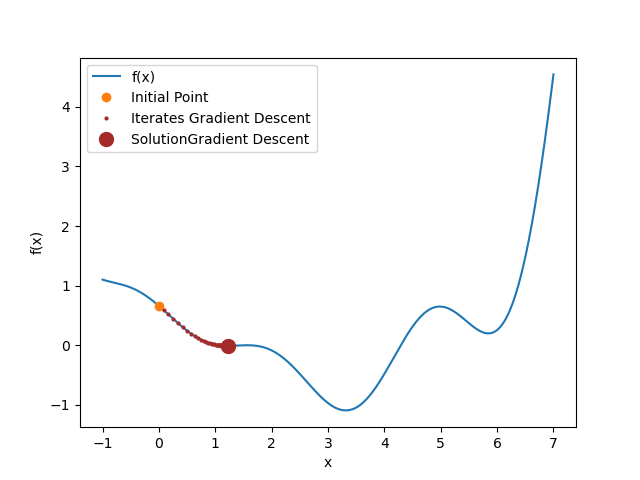

In [7]:
fig, ax = plt.subplots()
xs = np.linspace(-1, 7, num=1000)
fs = np.array([f(x) for x in xs])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.plot(xs, fs, label="f(x)")
ax.plot(x0, f(x0), "o", label="Initial Point")
ax.plot(iterates_gd, [f(x) for x in iterates_gd], ".", label="Iterates Gradient Descent", markersize=4, color="brown")
ax.plot(iterates_gd[-1], f(iterates_gd[-1]), "o", label="SolutionGradient Descent", markersize=10, color="brown")


ax.legend()

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

 Comment the plot
</div>

The algorithm stops in the first local minima it finds, and stop making progress because there the gradient is already null.

As a result, a local minimizer is found, but not the global one.


### Implement the Heavy-Ball method on $f$.

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

    
Complete the following code to compute the iterates of the Heavy ball method on $f(x)$
</div>

In [8]:
def HB(x0, n_iter=1000, alpha=0.1, beta=0.9):
    iterates = []
    x = 1 * x0
    x_previous = 1 * x0
    for k in range(n_iter):
        # ----- YOUR CODE
        diff = x - x_previous
        x_previous = 1 * x
        x = x + beta * diff - alpha * fprime(x)
        # --------- END YOUR CODE
        iterates.append(x)
    return iterates

In [9]:
# Compute the solution of GD
x0 = 0
iterates_hb = HB(x0, alpha=0.1)

### Visualize the iterations 

<IPython.core.display.Javascript object>


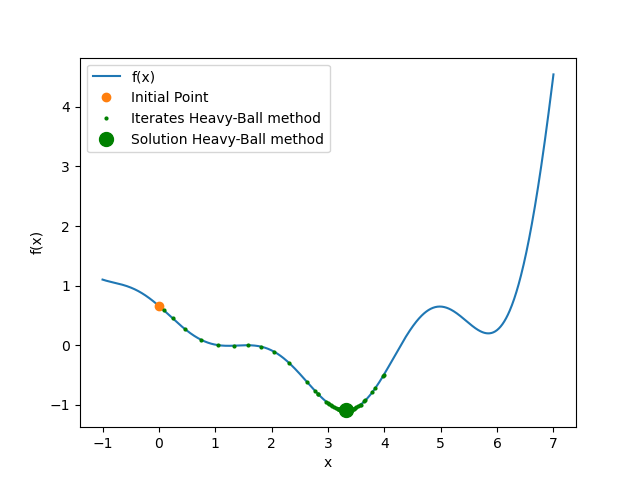

In [10]:
fig, ax = plt.subplots()
xs = np.linspace(-1, 7, num=1000)
fs = np.array([f(x) for x in xs])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.plot(xs, fs, label="f(x)")
ax.plot(x0, f(x0), "o", label="Initial Point")
ax.plot(iterates_hb, [f(x) for x in iterates_hb], ".", label="Iterates Heavy-Ball method", markersize=4, color="green")
ax.plot(iterates_hb[-1], f(iterates_hb[-1]), "o", label="Solution Heavy-Ball method", markersize=10, color="green")


ax.legend()

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

 Comment the plot
</div>

The algorithm does not stop in the first local minima it finds, but still continues a bit more thanks to the momentum.
As a result, the global minimizer is found.

# Conjugate Gradient Descent Method

## Description 

We are willing to sole the following optimziation problem, which comes from an optimal control application:
$$
    \min_{x \in R^n} \; f(x) = \frac{1}{2}\sum_{i=1}^n x_i^2 + (s_i(x) - \bar{s})^2
$$

where $s_i(x)$ computed from the following equations:
$$
s_0(x) = 0 \\
s_{i+1}(x) = \frac{s_i(x) + x_{i}}{2}
$$

In [11]:
n = 2000
sbar = 1.

## Imports

In [12]:
import numpy as np # Package for array manipulations
import matplotlib.pyplot as plt # Package for plotting
from time import time # Package to assess runtime

# Jupyter magic command to make the plots a bit nicer
%matplotlib notebook 
                     # replace with "%matplotlib inline" 
                     # in case one uses the VS code UI
                     # instead of the Jupyter UI
            
            

## Function $f$ 

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to compute $f(x)$
</div>

In [13]:
def f(x):
    cost = 0.
    s = 0.
    for i in range(n):
        # ----- YOUR CODE
        cost = cost + 0.5 * x[i]**2 + 0.5 * (s - sbar)**2
        s = 0.5 * (x[i] + s)
        # --------- END YOUR CODE
        
    return cost

## Efficient way to compute the gradient

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to efficiently compute the gradient of $f(x)$
</div>

<div class="alert alert-success">

**Tip:**
    
Define $g_{i}(x)$ and $\nabla s_{i}(x)$ recuresively, using the initial conditions
$$
    g_0(x) = 0 \\
    \nabla s_i(x) = 0
$$   
and the update rules:
$$
    g_{i}(x) = g_{i-1}(x) +  \nabla s_i(x) (s_i(x) - \bar{s}) \\
    \nabla s_{i+1}(x) = \frac{1}{2} \left( \nabla s_{i}(x)  + \nabla x_i \right)
$$
and remark that $\nabla f(x) = g_{n}(x)$
</div>

In [14]:
def gradient(x):
    g = x * 1.
    grad_s = np.zeros(n)
    s = 0
    for i in range(n):
        # ----- YOUR CODE
        g = g + grad_s * (s-sbar)
        s = 0.5 * (x[i] + s)
        grad_s[i] = grad_s[i] + 1.
        grad_s = 0.5 * grad_s
        # --------- END YOUR CODE
    return g

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to efficiently compute the product $Q p $
</div>

<div class="alert alert-success">

**Tip:**
    
Remark that if $\bar{s}=0$, then $\nabla f(x) = Qx$... that should give an idea of how to modify only a little bit the previous function to compute $Qx$ instead of $\nabla f(x)$
</div>

In [15]:
def Qp(x):
    g = x * 1.
    grad_s = np.zeros(n)
    s = 0
    for i in range(n):
        # ----- YOUR CODE
        g = g + grad_s * s
        s = 0.5 * (x[i] + s)
        grad_s[i] = grad_s[i] + 1.
        grad_s = 0.5 * grad_s
        # --------- END YOUR CODE
    return g

## Conjugate Gradient Descent Method

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to compute one step of CG
</div>

<div class="alert alert-success">

**Tip:**
    
We recall the algorithm from the lecture:
    $$
        q_k = Q p_k \\
        \alpha_k = \frac{d_k^\top p_k}{q_k^\top p_k} \\
        x_{k+1} = x_k + \alpha_k p_k \\
        d_{k+1} = d_k - \alpha_k q_k \\
        \gamma_k = - \frac{d_{k+1}^\top q_k}{q_k^\top p_k} \\
        p_{k+1} = \gamma_k p_k - d_{k+1}
    $$
with $d_0 = p_0 = -\nabla f(x_0)$
</div>

In [16]:
def CG_step(x, p, d):
    # ----- YOUR CODE
    q = Qp(p)
    pq = p @ q
    alpha = d @ p / pq
    x_next = x + alpha * p
    d_next = d - alpha * q
    gamma = - d_next @ q / pq
    p_next = gamma * p - d_next
    # --------- END YOUR CODE
    return x_next, p_next, d_next

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to compute the whole CG, with some stopping criterion
    $$
    || p_k || < tol
    $$
</div>

In [17]:
def CG(x0, tol=1e-6):
    iterates = []
    # ----- YOUR CODE
    xk = x0.copy()
    pk = -gradient(xk)
    dk = pk.copy()
    for i in range(n):
        iterates.append(xk.copy())
        if np.linalg.norm(pk) < tol:
            break
        xk, pk, dk = CG_step(xk, pk, dk)
    # --------- END YOUR CODE 
    return iterates


In [18]:
t0 = time()
iterates = CG(np.zeros(n))
runtime = time() - t0
x_cg = iterates[-1]
print(f"value found with CG = {f(x_cg):.5e} after N={len(iterates)} iterations, and t={runtime:.3f} sec")

value found with CG = 5.00500e+02 after N=15 iterations, and t=0.467 sec


### Visualize the iterates of CG 

<IPython.core.display.Javascript object>


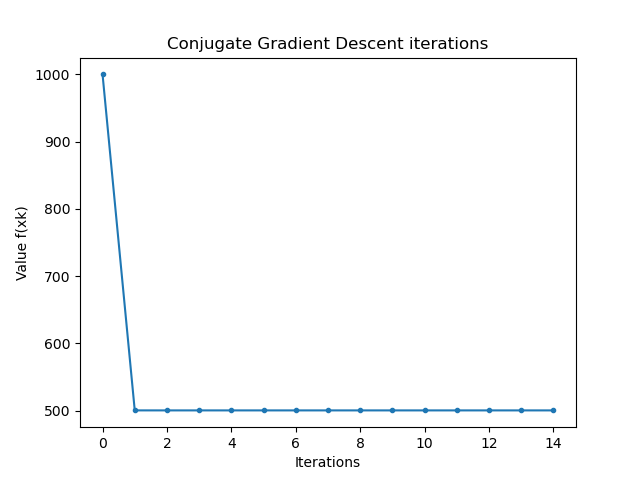

In [19]:
values = [f(x) for x in iterates]

fig, ax = plt.subplots()
ax.set_title("Conjugate Gradient Descent iterations")
ax.set_xlabel("Iterations")
ax.set_ylabel("Value f(xk)")
ax.plot(np.arange(len(iterates)), values, ".-")


## Greedy Method

<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Complete the following code to compute compute the solution $x^\star$
</div>

<div class="alert alert-success">

**Tip:**
    
To compute a matrix inverse $M^{-1}$, use the numpy function np.linalg.inv(M)
</div>

In [20]:
t0 = time()

# First, find A, b such that f(x) = 1/2 || x ||^2 + 1/2 || A x - b ||^2
b = sbar * np.ones(n)
A = np.zeros((n, n))
powers = 0.5**np.arange(1,n)
for i in range(1, n):
    A[i, :i] = powers[:i][::-1] # use s(i) = 1/2 x_(i-1) + 1/4 x_(i-2) + 1/8 x_(i-3) + 1/16 x_(i-4) + ...

# Now find Q and c such that f(x) = 1/2 x^T Q x - c^T x + r,
# this should help to find the solution x*
# ----- YOUR CODE
Q = np.eye(n) + A.T @ A
c = A.T @ b
x_star = np.linalg.inv(Q) @ c
# --------- END YOUR CODE

t_final = time()
print(f"optimal value = {f(x_star):.5e}, runtime = {t_final-t0:.3f} sec")

optimal value = 5.00500e+02, runtime = 3.370 sec


<hr/>
<div class="alert alert-block alert-info">
   
**Task:**

Comment the runtimes and compare them with the runtime of the CG method.

Which method is more efficient in for this example?
</div>